In [ ]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import os
import pickle


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/cancer_dataset.csv')

In [ ]:
# Exploratory Data Analysis (EDA)
print("First 5 rows of the dataset:")
print(df.head())

print("\nData types of columns:")
print(df.dtypes)

print("\nMissing values in the dataset:")
print(df.isnull().sum())

print("\nDuplicate rows in the dataset:")
print(df.duplicated().sum())


In [ ]:
# Detect and drop outliers
def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        if df[col].dtype != 'object':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
            outlier_indices.extend(outlier_list_col)
    outlier_indices = list(dict.fromkeys(outlier_indices))
    return outlier_indices

outliers_to_drop = detect_outliers(df, 2, df.columns.tolist())
df_cleaned = df.drop(outliers_to_drop, axis=0).reset_index(drop=True)

print("\nDataFrame after dropping outliers:")
print(df_cleaned)

In [ ]:

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Diagnosis Count')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Data Preprocessing
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import os

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy as a percentage
LR_accuracy = accuracy_score(y_test, y_pred) * 100
print("Logistic Regression Accuracy: {:.2f}%".format(LR_accuracy))

# Print precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Logistic Regression Accuracy: 97.37%
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [48]:
from sklearn.tree import DecisionTreeClassifier

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
DecisionT_model = DecisionTreeClassifier(random_state=42)

# Train the model
DecisionT_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = DecisionT_model.predict(X_test_scaled)

# Calculate accuracy as a percentage
DT_accuracy = accuracy_score(y_test, y_pred) * 100
print("Decision Tree Classifier Accuracy: {:.2f}%".format(DT_accuracy))

# Print precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Decision Tree Classifier Accuracy: 94.74%
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.96      0.96        71
           M       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [49]:
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest Classifier
RandomF_model = RandomForestClassifier(random_state=42)

# Train the model
RandomF_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = RandomF_model.predict(X_test_scaled)

# Calculate accuracy as a percentage
RF_accuracy = accuracy_score(y_test, y_pred) * 100
print("Random Forest Classifier Accuracy: {:.2f}%".format(RF_accuracy))

# Print precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Random Forest Classifier Accuracy: 96.49%
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [50]:
from sklearn.svm import SVC

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Support Vector Classifier
SVC_model = SVC(random_state=42)

# Train the model
SVC_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = SVC_model.predict(X_test_scaled)

# Calculate accuracy as a percentage
SVC_accuracy = accuracy_score(y_test, y_pred) * 100
print("Linear Support Vector Classifier Accuracy: {:.2f}%".format(SVC_accuracy))

# Print precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Linear Support Vector Classifier Accuracy: 98.25%
Classification Report:
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        71
           M       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [51]:
#butting all together
Algorithms = [ 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC']
accuracy = [LR_accuracy, DT_accuracy, RF_accuracy, SVC_accuracy]

FinalResult=pd.DataFrame({'Algorithm':Algorithms, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,Logistic Regression,97.368421
1,Decision Tree,94.736842
2,Random Forest,96.491228
3,SVC,98.245614


<Figure size 640x480 with 0 Axes>

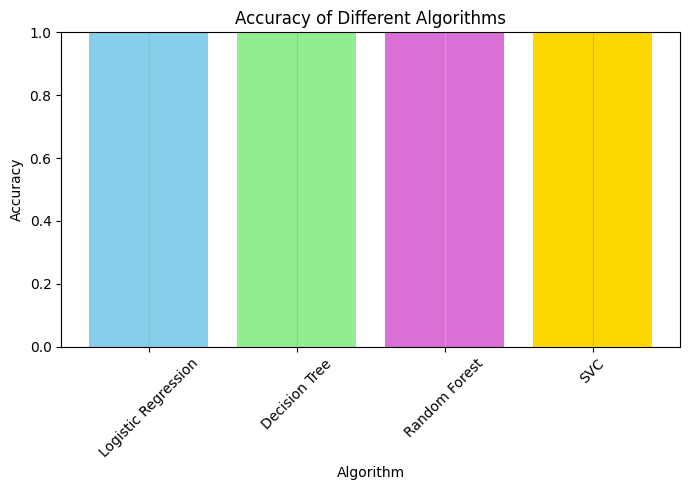

In [52]:
# Visualize the final result of the model training using a bar chart
import matplotlib.pyplot as plt

# Clear any existing figure
plt.clf()

# Define custom colors
colors = ['skyblue', 'lightgreen', 'orchid', 'gold']

# Plot the bar chart with custom colors
plt.figure(figsize=(7, 5))
plt.bar(FinalResult['Algorithm'], FinalResult['Accuracy'], color=colors)

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [53]:
# To compare the trained models with cross validation
from sklearn.model_selection import cross_val_score

# Define number of folds for cross-validation
cv = 5

In [54]:
# Calculate cross-validation scores for each model
LR_cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=cv)
DT_cv_scores = cross_val_score(DecisionT_model, X_train_scaled, y_train, cv=cv)
RF_cv_scores = cross_val_score(RandomF_model, X_train_scaled, y_train, cv=cv)
SVC_cv_scores = cross_val_score(SVC_model, X_train_scaled, y_train, cv=cv)

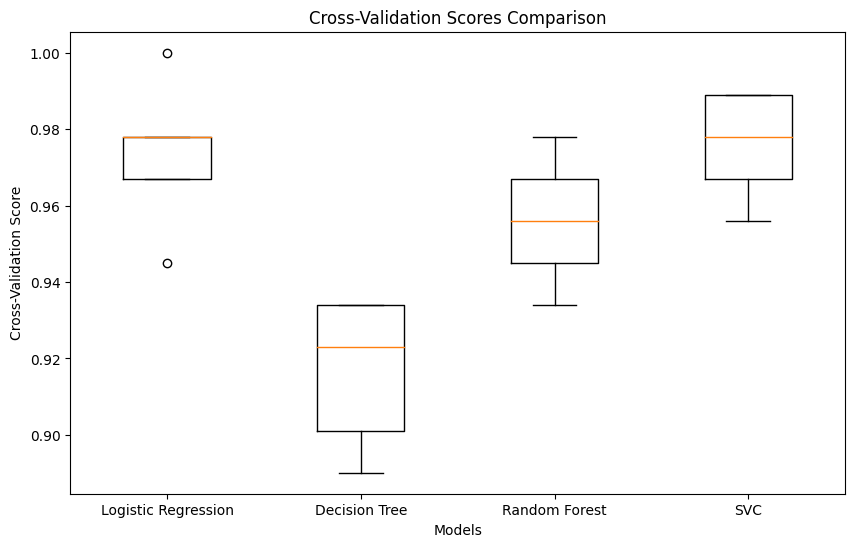

In [55]:
# Visualize the diagram
plt.figure(figsize=(10, 6))
plt.boxplot([LR_cv_scores, DT_cv_scores, RF_cv_scores, SVC_cv_scores], labels=
              ['Logistic Regression','Decision Tree', 'Random Forest', 'SVC'])

plt.xlabel('Models')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores Comparison')
plt.show()


In [60]:
# save the random forest pkl document in the google drive

# Get the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

# Specify the path to your Google Drive
google_drive_path = '/content/drive/My Drive/'

# Specify the folder name
folder_name = 'FINALPROJECT'

# Combine the Google Drive path with the folder nameQ
folder_path = os.path.join(google_drive_path, folder_name)

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Combine the folder path with the file name
file_path = os.path.join(folder_path, 'RandomF_model.pkl')

# Save the trained model as a pickle file with the full path
pickle.dump(RandomF_model, open(file_path, 'wb'))

# Print the file path where the model is saved
print("Model saved at:", file_path)

Current Working Directory: /content
Model saved at: /content/drive/My Drive/FINALPROJECT/RandomF_model.pkl


In [ ]:
import numpy as np


# Feature Selection
rf_feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rf_feature_selector.fit(X_train_scaled, y_train)
feature_selector = SelectFromModel(rf_feature_selector, prefit=True)
selected_feature_indices = feature_selector.get_support(indices=True)
X_train_selected = X_train_scaled[:, selected_feature_indices]
X_test_selected = X_test_scaled[:, selected_feature_indices]

# Train a Random Forest classifier on the selected features
rf_classifier_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_selected.fit(X_train_selected, y_train)

# Make predictions with the selected features on the test set
y_pred_selected = rf_classifier_selected.predict(X_test_selected)

# Evaluate the model with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy of Random Forest with selected features:", accuracy_selected)

# Feature Importance Plot
import matplotlib.pyplot as plt

# Get feature importances from the trained Random Forest model
feature_importances = RandomF_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()






In [ ]:
# Test Data Prediction and Submission
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')
customer_ids = test_df['id']
X_test = test_df.drop('id', axis=1)

scaler = StandardScaler()


def predict(X_test):
    # Make predictions on the test set
    y_pred_labels = RandomF_model.predict(X_test)

    return y_pred_labels

# Make predictions on the test set
y_pred_test = predict(X_test_scaled)

# Map predicted labels to their corresponding categories
y_pred_test_labels = ['No Cancer' if label == 'N' else 'M' if label == 'M' else 'B' for label in y_pred_test]

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': customer_ids, 'diagnosis': y_pred_test_labels})

# Save the DataFrame as a CSV file for submission
submission_df.to_csv('submission.csv', index=False)

In [62]:
from google.colab import files

# Download the submission.csv file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>